<a href="https://colab.research.google.com/github/heritoky02/machine_learning/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# reading the data
data = pd.read_csv('/content/clean_weather.csv', index_col = 0)
data.ffill()

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0
...,...,...,...,...
2022-11-22,62.0,35.0,0.0,67.0
2022-11-23,67.0,38.0,0.0,66.0
2022-11-24,66.0,41.0,0.0,70.0
2022-11-25,70.0,39.0,0.0,62.0


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

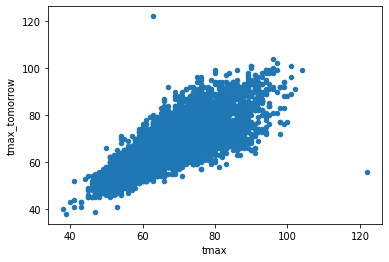

In [ ]:
data.plot.scatter('tmax', 'tmax_tomorrow')

In [ ]:
data.corr() # to see what correlation coeficient is and it is 0.818820

,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.615134,-0.221703,0.818820
tmin,0.615134,1.000000,-0.018215,0.584958
rain,-0.221703,-0.018215,1.000000,-0.213239
tmax_tomorrow,0.818820,0.584958,-0.213239,1.000000


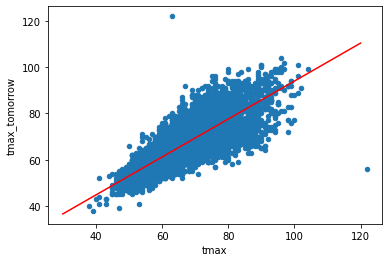

In [ ]:
import matplotlib.pyplot as plt 
data.plot.scatter('tmax', 'tmax_tomorrow')
prediction = lambda x, w1 = .82, b = 11.99: x * w1 + b
plt.plot([30,120], [prediction(30), prediction(120)], "red") # this red line is the best linear prediction to do to make the prediction of tmax_tomorrow

In [25]:
import numpy as np

def mse(actual, predicted):
  return np.mean((actual - predicted) ** 2)

print(mse(data["tmax_tomorrow"], prediction(data["tmax"], .82, 13)))

24.054047887323932


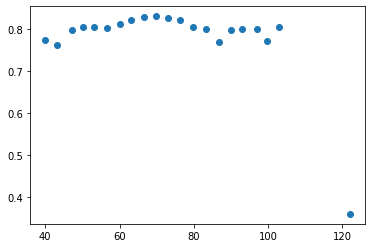

In [33]:
tmax_bins = pd.cut(data["tmax"], 25)
ratios = (data["tmax_tomorrow"] - 11.99) / data["tmax"]
binned_ratios = ratios.groupby(tmax_bins).mean()
binned_ratios

binned_tmax = data["tmax"].groupby(tmax_bins).mean()
plt.scatter(binned_tmax, binned_ratios)

In [34]:
binned_ratios

tmax
(37.916, 41.36]     0.773904
(41.36, 44.72]      0.762256
(44.72, 48.08]      0.798484
(48.08, 51.44]      0.805470
(51.44, 54.8]       0.803930
(54.8, 58.16]       0.802731
(58.16, 61.52]      0.812692
(61.52, 64.88]      0.821498
(64.88, 68.24]      0.829101
(68.24, 71.6]       0.830006
(71.6, 74.96]       0.825894
(74.96, 78.32]      0.822207
(78.32, 81.68]      0.804168
(81.68, 85.04]      0.800264
(85.04, 88.4]       0.769633
(88.4, 91.76]       0.796350
(91.76, 95.12]      0.798793
(95.12, 98.48]      0.800002
(98.48, 101.84]     0.771119
(101.84, 105.2]     0.805621
(105.2, 108.56]          NaN
(108.56, 111.92]         NaN
(111.92, 115.28]         NaN
(115.28, 118.64]         NaN
(118.64, 122.0]     0.360738
dtype: float64

In [35]:
binned_tmax

tmax
(37.916, 41.36]      40.000000
(41.36, 44.72]       43.250000
(44.72, 48.08]       47.096774
(48.08, 51.44]       50.287179
(51.44, 54.8]        53.212121
(54.8, 58.16]        56.658213
(58.16, 61.52]       60.032571
(61.52, 64.88]       63.009014
(64.88, 68.24]       66.518336
(68.24, 71.6]        69.943085
(71.6, 74.96]        72.930196
(74.96, 78.32]       76.162471
(78.32, 81.68]       79.919355
(81.68, 85.04]       83.326316
(85.04, 88.4]        86.847826
(88.4, 91.76]        89.990099
(91.76, 95.12]       93.111111
(95.12, 98.48]       97.058824
(98.48, 101.84]      99.666667
(101.84, 105.2]     103.000000
(105.2, 108.56]            NaN
(108.56, 111.92]           NaN
(111.92, 115.28]           NaN
(115.28, 118.64]           NaN
(118.64, 122.0]     122.000000
Name: tmax, dtype: float64